In [28]:
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import scipy.stats as stats

In [29]:
np.set_printoptions(threshold=10e10, linewidth=10e10)

In [30]:
NUM_ARMS = 3
# NUM_BANDITS = 4

In [31]:
def interleave_arrays(a: np.ndarray, b: np.ndarray) -> np.ndarray:
	return np.ravel((a, b), order='F')

In [32]:
# ms = np.sort(np.random.normal(0, 1, (NUM_BANDITS, NUM_ARMS))) # means
ms = np.array([
	[1, 2, 4],
	[1, 3, 4],
])
NUM_BANDITS = ms.shape[0]
vs = np.full((NUM_BANDITS, NUM_ARMS), 1) # variances

# interleave means and variances together
# mvs = np.array([interleave_arrays(ms[i], vs[i]) for i in range(NUM_BANDITS)])
mvs = ms

print(mvs)

[[1 2 4]
 [1 3 4]]


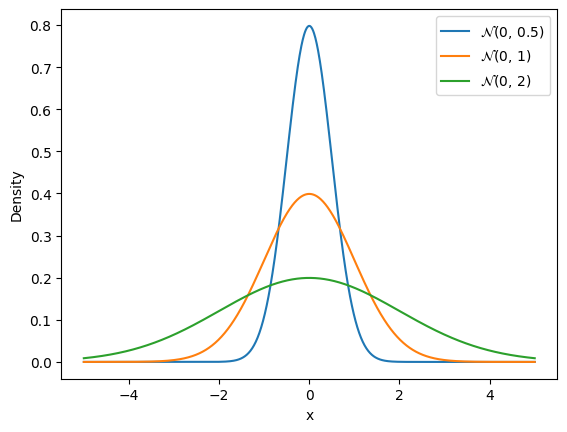

In [46]:
dists = [
	(0, 0.5),
	(0, 1),
	(0, 2),
]

# plot the above distributions
for dist in dists:
	x = np.linspace(-5, 5, 1000)
	y = stats.norm.pdf(x, dist[0], dist[1])
	plt.plot(x, y, label=r"$\mathcal{N}$(" + str(dist[0]) + ", " +  str(dist[1]) + ")")
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")
plt.savefig("data/img/pdf/dists.pdf", bbox_inches='tight')
plt.show()

/tmp/ipykernel_1382110/3060645941.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


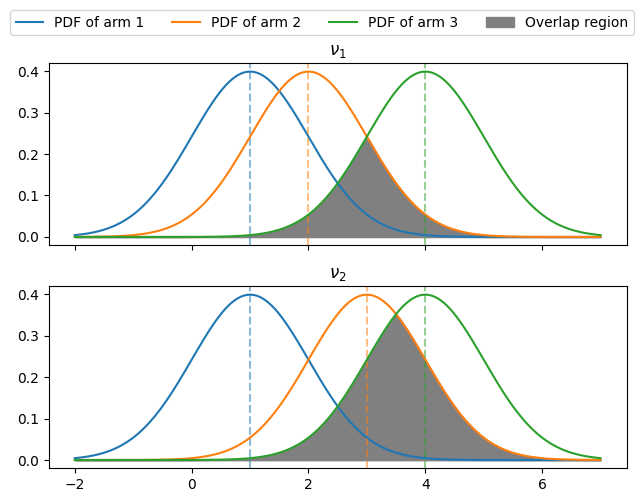

In [26]:
# plot all normal distributions
fig, axs = plt.subplots(NUM_BANDITS, 1, layout='constrained', sharex=True, sharey=True)
x = np.linspace(-2, 7, 1000)

colors = ['tab:blue', 'tab:orange', 'tab:green']

for bandit_idx, ax in enumerate(axs):
	pdfs = [stats.norm.pdf(x, m, s) for m, s in zip(ms[bandit_idx], vs[bandit_idx])]
	for pdf_idx, pdf in enumerate(pdfs):
		ax.plot(x, pdf, label=f'PDF of arm {pdf_idx + 1}', color=colors[pdf_idx])
		ax.axvline(ms[bandit_idx][pdf_idx], linestyle='--', color=colors[pdf_idx], alpha=0.5)
	overlap1 = np.minimum(pdfs[2], pdfs[0])
	overlap2 = np.minimum(pdfs[2], pdfs[1])
	ax.fill_between(x, 0, overlap1, where=(overlap1 > 0), color='grey', alpha=1, label='Overlap region')
	ax.fill_between(x, 0, overlap2, where=(overlap2 > 0), color='grey', alpha=1)
	ax.set_title(rf'$\nu_{bandit_idx + 1}$')

handles, labels = axs[0].get_legend_handles_labels()
axbox = axs[-1].get_position()
fig.legend(handles, labels, bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=NUM_ARMS + 1)
plt.tight_layout()
# plt.show()
plt.savefig('data/img/pdf/bandits_arm_dist.pdf', bbox_inches='tight', format='pdf')

# TVD

In [42]:
def tvd(mu_1, sigma_1, mu_2, sigma_2):
	# calculate total variation distance given the means and variances of two normal distributions
	x = np.linspace(min(mu_1 - 3 * sigma_1, mu_2 - 3 * sigma_2), max(mu_1 + 3 * sigma_1, mu_2 + 3 * sigma_2), 1000)
	pdf_1 = stats.norm.pdf(x, mu_1, sigma_1)
	pdf_2 = stats.norm.pdf(x, mu_2, sigma_2)
	return 0.5 * np.trapz(np.abs(pdf_1 - pdf_2), x)

In [43]:
def bandit_difficulties(bandits):
	# difficulty of only one bandit
	if len(bandits) == 1:
		difficulty = 0
		best_arm = np.max(bandits[0])
		for arm1 in bandits[0]:
			# for arm2 in bandits[0]:
			difficulty += tvd(arm1, 1, best_arm, 1)
		difficulty /= (NUM_ARMS)
		return difficulty

	# # relative difficulties of more than one bandit
	# relative_distances = np.zeros((bandits.shape[0], bandits.shape[0]))
	# for b1_idx, bandit1 in enumerate(bandits):
	# 	for b2_idx, bandit2 in enumerate(bandits):
	# 		for arm1 in bandit1:
	# 			# for arm2 in bandit2:
	# 			relative_distances[b1_idx, b2_idx] += tvd(arm1, 1, arm2, 1)
	# 		relative_distances[b1_idx, b2_idx] /= (NUM_ARMS ** 2)
	# return relative_distances

In [44]:
# relative_distances = bandit_difficulties(mvs)
# print(mvs)
# print(relative_distances)

# plt.imshow(relative_distances, cmap='Blues')
# for i in range(NUM_BANDITS):
# 	for j in range(NUM_BANDITS):
# 		plt.text(j, i, round(relative_distances[i, j], 4), ha='center', va='center', color='black')

# cbar = plt.colorbar()
# plt.title('Total Variation Distance')

# plt.xticks(np.arange(NUM_BANDITS), labels=mvs)
# plt.yticks(np.arange(NUM_BANDITS), labels=mvs)
# plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
# plt.setp(plt.gca().get_xticklabels(), rotation=-45, ha='right', rotation_mode='anchor')
# plt.savefig('data/img/pdf/tvd_heatmap.pdf', bbox_inches='tight', format='pdf')

print(mvs)
difficulty = np.array([bandit_difficulties([mv]) for mv in mvs])
print(difficulty[:, np.newaxis])

[[1.000e-01 1.000e-01 1.000e-01]
 [1.000e-01 1.100e-01 1.200e-01]
 [1.000e-01 1.000e-01 5.000e-01]
 [1.100e+00 1.100e+00 1.500e+00]
 [1.100e+00 1.200e+00 1.500e+00]
 [1.100e+00 1.400e+00 1.500e+00]
 [1.001e+02 1.001e+02 1.005e+02]]
[[0.        ]
 [0.00394615]
 [0.10500446]
 [0.10500446]
 [0.09195859]
 [0.06566735]
 [0.10500446]]
